For task 2, I chose Infosys INFY for analysis.
Reasons to choose:

Strong Performance:
 It is a fundamentally strong company and one of the top performing stocks in the field of technology.

Economic Resilience:
The company's stability shields it from minor economic shifts. This resilience ensures that investment indicators and strategies can be confidently implemented, reducing concerns related to unpredictable market fluctuations.

Recent Stock Growth:
The performance of the stock in the past few months makes it an attractive pick for our portfolio.

Sustainable Growth Drivers:
A significant factor fueling the company's growth is the increasing demand due to digital transformation, driven by the trust of both investors and customers. This organic growth, rooted in trust and digital evolution, is more sustainable and desirable compared to fleeting or temporary growth strategies.


In [1]:
# Libraries
import yfinance as yfinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as datetime

In [2]:
# connect to yfinance as yfinance
yfinance.pdr_override

<function yfinance.pdr_override()>

In [8]:
# settings
symbol = 'INFY.NS'
start_date = '2023-10-1'
end_date = datetime.now()

In [9]:
# Requesting historical data
data = yfinance.download(symbol, start=start_date, end=end_date)

# Print all rows of the data
print("\n")
print(data)

[*********************100%%**********************]  1 of 1 completed



                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-10-03  1436.050049  1437.000000  1420.300049  1434.000000  1415.676147   
2023-10-04  1425.000000  1449.949951  1418.199951  1444.349976  1425.893799   
2023-10-05  1452.000000  1475.650024  1450.199951  1463.449951  1444.749756   
2023-10-06  1469.500000  1484.500000  1463.300049  1478.699951  1459.804932   
2023-10-09  1464.900024  1491.000000  1462.199951  1475.449951  1456.596436   
...                 ...          ...          ...          ...          ...   
2024-04-01  1525.000000  1529.949951  1492.800049  1495.449951  1495.449951   
2024-04-02  1484.849976  1493.150024  1480.849976  1482.849976  1482.849976   
2024-04-03  1479.000000  1495.099976  1475.000000  1480.650024  1480.650024   
2024-04-04  1490.550049  1495.650024  1468.000000  1486.699951  1486.699951   
2024-04-05  1480.050049  1486.699951  1476.050049 

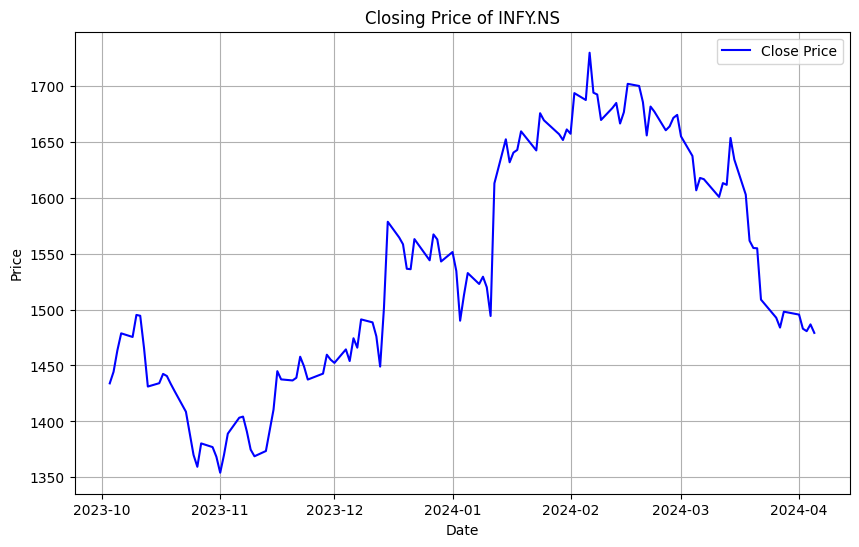

In [10]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title(f'Closing Price of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Calculating RSI
# setting the RSI Period
days = 14

# Calculate the price difference
delta = data['Close'].diff(1)

# Separate positive and negative price changes
positive = delta.copy()
negative = delta.copy()
positive[positive < 0] = 0
negative[negative > 0] = 0

# Calculate average gain and average loss
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

# Calculate relative strength
relative_strength = average_gain / average_loss

# Calculate RSI
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

# Print RSI
print(RSI)

Date
2023-10-03          NaN
2023-10-04          NaN
2023-10-05          NaN
2023-10-06          NaN
2023-10-09          NaN
                ...    
2024-04-01    26.541308
2024-04-02    26.880045
2024-04-03    22.944814
2024-04-04    24.959837
2024-04-05     9.431762
Name: Close, Length: 125, dtype: float64


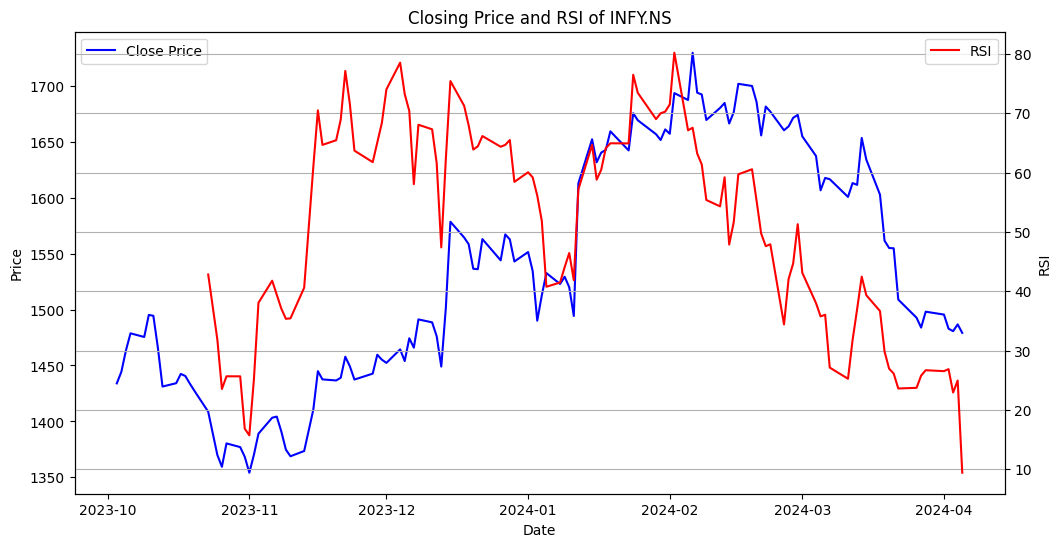

In [12]:
# Plot the closing price and RSI
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title(f'Closing Price and RSI of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(RSI.index, RSI, color='red', label='RSI')
plt.ylabel('RSI')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()


Next indicator to be used here is MACD(Moving Average convergence divergence).

In [13]:
# Calculating MACD
close = data['Close']
data['EMA12'] = close.ewm(span=12, adjust=False).mean()
data['EMA26'] = close.ewm(span=26, adjust=False).mean()

data['MACD_LINE']=data['EMA12']-data['EMA26']
data['MACD_SIGNAL']= data['MACD_LINE'].ewm(span=9, adjust=False).mean()

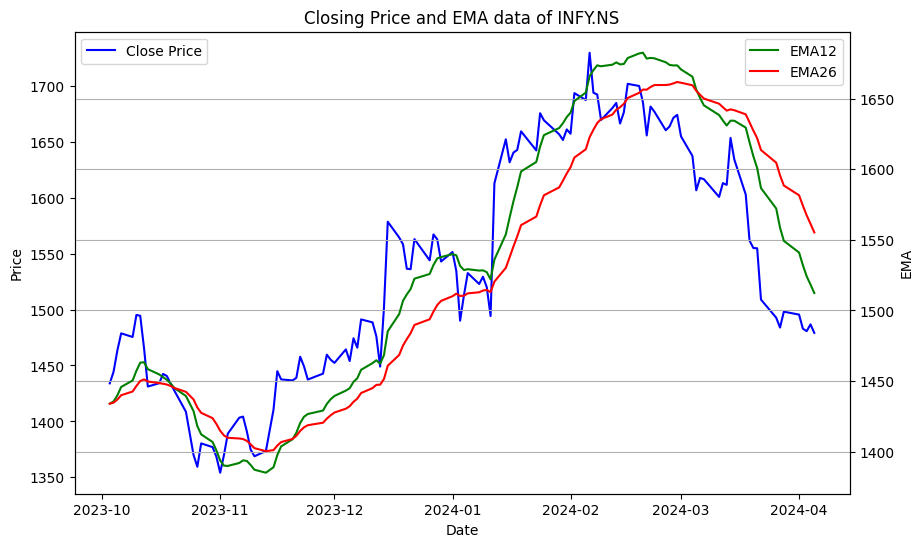

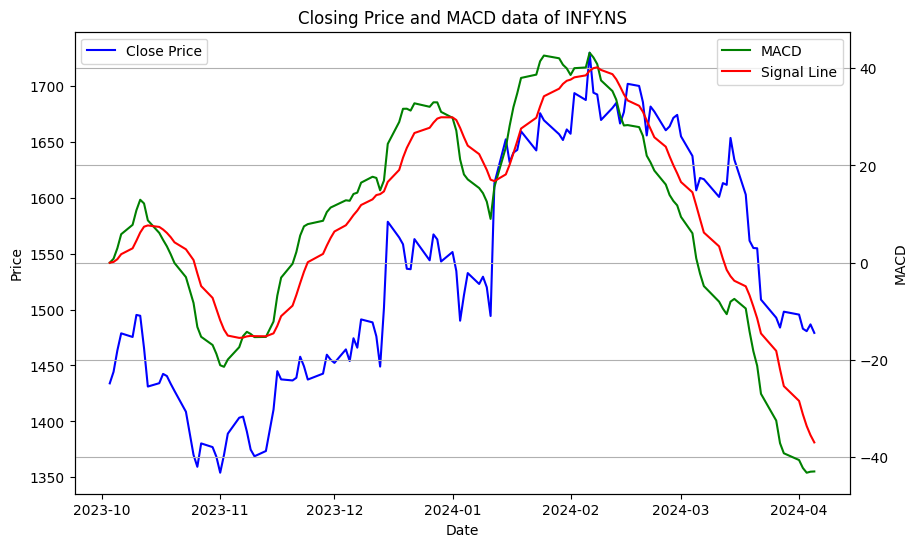

In [14]:
# Plot the MACD AND MACD signal
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title(f'Closing Price and EMA data of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(data.index, data['EMA12'], color='green', label='EMA12')
plt.plot(data.index, data['EMA26'], label='EMA26', color='red')
plt.ylabel('EMA')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title(f'Closing Price and MACD data of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(data.index, data['MACD_LINE'], color='green', label='MACD')
plt.plot(data.index, data['MACD_SIGNAL'], label='Signal Line', color='red')
plt.ylabel('MACD')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Next indicator we are going to make is Bollinger Bands.

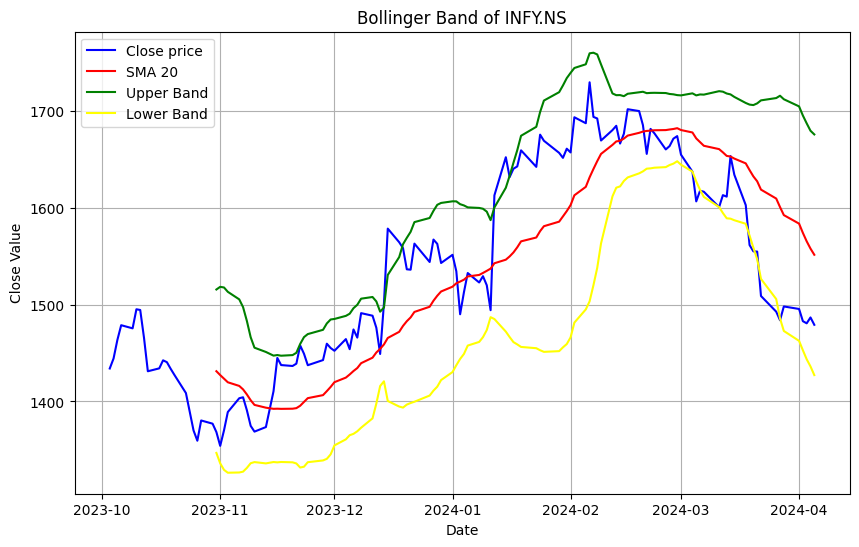

In [15]:
#Bollinger Bands consists of 1) Simple Moving Average 2) Upper band 3) Lower Band
# setting the deviation period
deviation_period = 20

# simple way to calculate Standard Deviation is to use std()
data['std_20'] = data['Close'].rolling(20).std()

# setting SMA Period to 20
sma_period = 20

# calculating individual components of Bollinger Bands
data['sma_20'] = data['Close'].rolling(sma_period).mean()
data['upper_band_20'] = data['sma_20'] + 2 * data['std_20']
data['lower_band_20'] = data['sma_20'] - 2 * data['std_20']

# Plot the Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close price')
plt.plot(data.index, data['sma_20'], color='red', label='SMA 20')
plt.plot(data.index, data['upper_band_20'], label='Upper Band', color='green')
plt.plot(data.index, data['lower_band_20'], label='Lower Band', color='yellow')
plt.title(f'Bollinger Band of {symbol}')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()



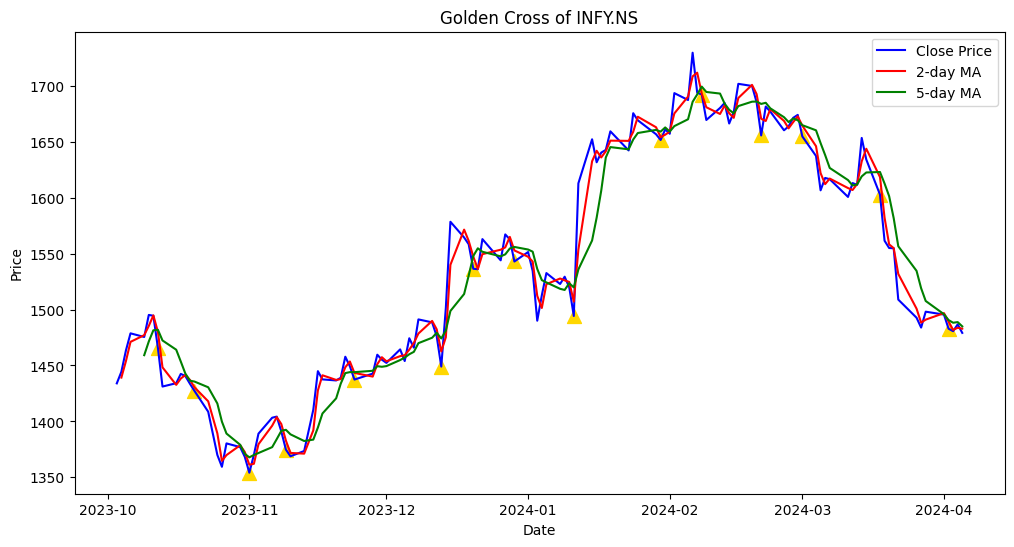

In [16]:
# plotting the graph of Short term and Long term SMA and Golden Cross points
short_term_period=2
long_term_period=5
# Calculate the short-term moving average (e.g., 2-day MA)
short_ma = data['Close'].rolling(short_term_period).mean()

# Calculate the long-term moving average (e.g., 5-day MA)
long_ma = data['Close'].rolling(long_term_period).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, short_ma, label='2-day MA', color='red')
plt.plot(data.index, long_ma, label='5-day MA', color='green')

# Plot the Golden Cross points
for i in range(1, len(data)):
    if short_ma[i] < long_ma[i] and short_ma[i - 1] >= long_ma[i - 1]:
        plt.scatter(data.index[i], data['Close'][i], color='gold', marker='^', s=100)
plt.title(f'Golden Cross of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Now we will see some features developed using these indicators which can be used to generate buy and sell signals.

First feature we are going to develop is using MACD and Bollinger Bands.

MACD (Moving Average Convergence Divergence) is a momentum Indicator, tells us about the momentum of a trend.
On the other hand, Bollinger Band tells us about the trend reversals.
Combining both of them allows us a comprehensive analysis of the market. It helps us to identify the points of trend reversals and breakouts thus enhances our trading strategy.

MACD:
If the slope of MACD line is rising, or if the line is above the zero line, the trend is considered to be bullish. On the other hand if the line turns down from above zero or the line is below zero it is considered to be bearish.

Bollinger Bands:
It is a volatility indicator. Prices always have a tendency to bounce from one band and move towards the other band. If a stock price bounced from lower band it will move towards the upper band. If the price moves outside the band and stays out for a longer time, it indicates a strong trend continuation.

This feature uses these qualities of the two indicators.

BUY SIGNAL:
1) Price has bounced from the lower band of the Bollinger Band and MACD Line is below Zero or has positive slope (Buy 100 shares)

2) If slope of MACD Line is positive and the there is a price breakout (Closing price has crossed the upper band of the Bollinger Bands) (Buy 100 shares)

Buying price = Total amount invested/Total no. of shares

SELL SIGNAL:
1) If price breakout has occured for last three days and slope is declining, sell 50% of the shares.

2) If Closing price < 70% of the buying price, sell 50% of the shares.

HOLD SIGNAL:
1) Slope is positive but has not touched the upper band of Bollinger Bands, hold the shares.

2) If price breakout is continuous for three days, hold.

3) In all other cases, hold.